# Google Colab
Google Colab allows people to write and execute python code in-browser in sections as well as make formatted comments. This is invaluable when working with others and keeping your code accessible. It is perfect for the purposes of this course, and we highly encourage you to use it as well!

Some things to know:

Cells - In Google Colab, cells are chunks of code or text.

Running a Cell - A code cell can be run by hovering over the cell brackets and clicking the Play button.

Output - The three ways to get output in Colab are as following: using a print statement; plotting something; or if the final line of a code cell is a variable with no assignment, Colab will print that variable.

Deleting Output - You can print output which appears below the cell. To delete this output, hover over the icon on the left side and click the X button. Things may be printed to output without using the actual print function.

Showing Hidden Solution Sections - These tutorials will always have hidden solution sections. To show these sections, click on the **SHOW CODE** text or double click on the cell. Only do this after trying to solve it yourself (and trying to debug).

Try unhiding the cell directly below, running it, and clearing the output.

In [1]:
#@title
string = "Hello World"
print(string + ' (using print function)')
string + ' (without print function)'


Hello World (using print function)


'Hello World (without print function)'

# Loading Data into Google Colab
The three simplest ways to load data into Google Colab are as follows:
1. Find data which is available online through a link, e.g.
https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv
These can be easily loaded in by many libaries, such as Pandas. Obviously, this is mostly just useful for testing purposes, unless the data you need is available online. For this course, we have made all the necessary data into links to avoid any hassle and avoid wasting time.

2. Load the data in through various libraries. Many libaries, such as Keras, give you access to different sorts of datasets, which could even save you valuable time doing pre-processing, e.g.
```
from keras.datasets import mnist
mnist.load_data()
```

3. Finally, you will need to create or gather custom data yourself. The easiest way to save it to, and load it from Google Drive, e.g.
```
import os
from google.colab import drive
drive.mount('/path/to/data/in/drive')
```
From here you are given an authorization link and a code prompt. Click the link, log into your account, and copy/paste the access code into the prompt. Now you can click on the 'Files' icon on the left sidebar of Google Colab, copy the path of your data, and load said data from there.
```
import pandas as pd
df=pd.read_csv('in/files/data.csv')
```




# Datatypes
The following datatypes are used to bring stored data from outside sources & files into your Python scripts for use. Some are more useful for data preparation, something you'll find you need to do before performing any ML.

We'll also introduce you to two libaries which encapsulate these datatypes: Pandas and Numpy.

In [2]:
import pandas as pd
import numpy as np

# Pandas Dataframes
Dataframes are Pandas data structures which function similar to how CSVs look, with columns and rows. CSVs are commonly loaded into these dataframes, although they support many file types. Pandas is generally used for data manipulation and preparation.

In [3]:
df = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
print(df.head())  # outputs first five rows of dataframe
df.describe() # give you a summary of the statistics of each columns of your dataframe (ex. mean, std, max, min) [for BOTH numeric & categorical variables]

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Do NOT ignore Pandas' many, many built-in functions that can help you re-shape your data! They're probably a Google search away!

In [4]:
# Create a copy of the df loaded above (So we won't have to reload it)
df_copy = df.copy()

# Mask data (Which is to remove data which doesn't satisfy the mask's conditions)
petal_length_mask = ((df_copy['petal.length'] >= 1.5) & (df_copy['petal.length'] < 2))  # like a dictionary's key value pair lookup (filter)
df_copy = df_copy[petal_length_mask]
print(df_copy.head())

# Re-shape index after mask
df_copy.reset_index(drop=True, inplace=True)
print(df_copy.head())

# Convert length measurements from centimeters to meters
cols = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
df_copy[cols] = df_copy[cols].applymap(lambda s: s/100)
print(df_copy.head())

    sepal.length  sepal.width  petal.length  petal.width variety
3            4.6          3.1           1.5          0.2  Setosa
5            5.4          3.9           1.7          0.4  Setosa
7            5.0          3.4           1.5          0.2  Setosa
9            4.9          3.1           1.5          0.1  Setosa
10           5.4          3.7           1.5          0.2  Setosa
   sepal.length  sepal.width  petal.length  petal.width variety
0           4.6          3.1           1.5          0.2  Setosa
1           5.4          3.9           1.7          0.4  Setosa
2           5.0          3.4           1.5          0.2  Setosa
3           4.9          3.1           1.5          0.1  Setosa
4           5.4          3.7           1.5          0.2  Setosa
   sepal.length  sepal.width  petal.length  petal.width variety
0         0.046        0.031         0.015        0.002  Setosa
1         0.054        0.039         0.017        0.004  Setosa
2         0.050        0.034      

# Exercise Practice
Try to perform the following 3 operations on the data using built-in Pandas functions:
1. Create a mask which limits sepal width between 3.0 and 3.6 inclusive.
2. Drop the 'variety' column.
3. Calculate the mean sepal length and drop sepal values below that mean.

Now, there is hidden solution code if you get stuck, but do not open it until you've looked up some functions and tried them! You may even come up with a completely different solution. Use *.head()* and *.describe()* to verify your results.

In [5]:
# Creates a copy of the df loaded above (So we won't have to reload it)
df_copy = df.copy()

# TODO - 1
sepal_width_mask = ((df_copy['petal.width'] >= 3.0) & (df_copy['petal.width'] <= 3.6))  # this mask limits sepawl width as per req.
df_copy = df_copy[sepal_width_mask] # creates a new dataframe with the target mask 
print(df_copy.head()) # outputs the 1st five values of the new dataframe

# TODO - 2
df_copy.drop('variety', axis=1, inplace = True) # column name, (row, col) -> so axis (index) = 1, inplace mutation of the dataframe, so not a copy
print(df_copy.head()) # outputs the newly mutated df
print(df_copy.describe()) # summary of df's new stats

# TODO - 3
mean_sepal_length = df_copy["sepal.length"].mean() # the target mean value
mean_sepal_length_mask = (df_copy["sepal.length"] < mean_sepal_length)  # the filtering mask
df_copy = df_copy[mean_sepal_length_mask] # the df with the newly filtered sepal lengths (does NOT get rid of the other non-sepal length variables!)
print(df_copy.describe()) # summary of df's new stats

Empty DataFrame
Columns: [sepal.length, sepal.width, petal.length, petal.width, variety]
Index: []
Empty DataFrame
Columns: [sepal.length, sepal.width, petal.length, petal.width]
Index: []
       sepal.length  sepal.width  petal.length  petal.width
count           0.0          0.0           0.0          0.0
mean            NaN          NaN           NaN          NaN
std             NaN          NaN           NaN          NaN
min             NaN          NaN           NaN          NaN
25%             NaN          NaN           NaN          NaN
50%             NaN          NaN           NaN          NaN
75%             NaN          NaN           NaN          NaN
max             NaN          NaN           NaN          NaN
       sepal.length  sepal.width  petal.length  petal.width
count           0.0          0.0           0.0          0.0
mean            NaN          NaN           NaN          NaN
std             NaN          NaN           NaN          NaN
min             NaN          Na

In [6]:
#@title
# Create a copy of the df loaded above (So we won't have to reload it)
df_copy = df.copy()

# 1
sepal_width_mask = ((df_copy['sepal.width'] >= 3.0) & (df_copy['sepal.width'] <= 3.6))
df_copy = df_copy[sepal_width_mask]
print(df_copy.head())

# 2
df_copy.drop('variety', axis=1, inplace=True)
# Or you could use this notation
#del df_copy['variety']
print(df_copy.head())
print(df_copy.describe())

# 3
sepal_length_mean_mask = (df_copy["sepal.length"] < df_copy["sepal.length"].mean())
df_copy = df_copy[sepal_length_mean_mask]
print(df_copy.describe())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
   sepal.length  sepal.width  petal.length  petal.width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
       sepal.length  sepal.width  petal.length  petal.width
count     78.000000    78.000000     78.000000    78.000000
mean       5.792308     3.201282      3.510256     1.146154
std        0.913786     0.193057      1.933074     0.880480
min        4.300000     3.000000      1.

# Numpy Arrays
Numpy Arrays are data structures that, on the surface, act similarly to Python lists. However, they have much more complexity because they can handle different dimensions of data, support many built-in functions that help you re-structure and shape your data, are used by many other libraries, and also perform operations much more quickly than native Python operations. We will be using these arrays mostly as inputs to ML models through Tensorflow's Keras.

In [7]:
lst = [[1, 3, 5], [2, 4, 7], [9, 8, 6]] # (3 nested dimensions, 3 elements inside each nest)
array = np.asarray(lst)

# mix_list = [[1, 2], [1], [2, 1, 3]]
# mix_array = np.asarray(mix_list)  # can't use this function with ragged nested sequences (need to use something else + must specify 'dtype=object' when creating the ndarray)

print(array)
print(array.shape)  # (# of dimensions, # of elements in a dimension)

[[1 3 5]
 [2 4 7]
 [9 8 6]]
(3, 3)


# Numpy & Images
Take images. Using the help of another library, PIL for example, Numpy can represent these images in array form, which can be directly used as input data in a machine learning model (provided the input dimensions match the input layer size).

Try downloading an image called 'image' onto your drive (more specifically the top folder, 'My Drive') mounting your drive as described above, and making sure the image loaded correctly using the plotting libary matplotlib.

In [8]:
# TODO - Mount drive to desired path
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir('drive')
os.chdir('My Drive')
!ls

Mounted at /content/drive
'AI Collab Notebooks'   image.jpg      'Summer Internships.gdoc'
 Applications	        LearnAI        'The Student Spotlight Podcast'
 Audio		        Miscellaneous   Videos
'Colab Notebooks'       Neuroscience    WiSC
'COMPUTER SCIENCE'      Photos	       'WiSC Book.docx'
'GoodNotes Backup'      PSYCHOLOGY     'YT '
'High School'	        Software


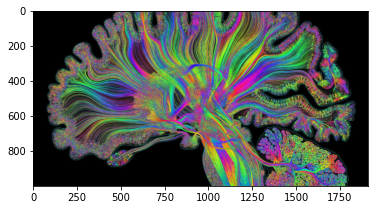

In [9]:
from matplotlib import image
from matplotlib import pyplot as plt

# TODO - Load the image (Change extension if needed)
image = image.imread('image.jpg')

# Display the image in Colab
# (Ensures image loaded properly)
plt.imshow(image)
plt.show()

Now that the image is ready, load said image from Files using PIL, and then convert it into a numpy array and get used to how it looks.

In [10]:
from PIL import Image
from numpy import asarray

# TODO - Load the image (Change extension if needed)
image = Image.open('image.jpg') # opens the image file

# Convert image to numpy array
data = asarray(image) # converts the image file into an array

# View Numpy array
print(data.shape) # outputs (# of dimensions, # of elements in dimension) -> (provided the input dimensions match the input layer size)
print(data) # outputs the array representation of the image

# NOTE: the array outputs the head and tail (first 5 dimensions, last 5 dimensions)

(998, 1910, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


# Numpy & Saving
Now that we have created a Numpy array, we may want to save this array such that we can load it directly - rather than loading, doing pre-processing on, and then converting the image into the array again.

When working with large amounts of data, this saves valuable computation time each time you train a machine learning model, since all the data pre-processing will only be done once (unless you make a mistake or want to change something).

In [11]:
with open('test.npy', 'wb') as f:
    np.save(f, data)  # saves the image's array directly (to avoid pre-processing the image every single time we want to use the array representation)

with open('test.npy', 'rb') as f:
    data_loaded = np.load(f)  # loads the saved image's array

data_loaded # outputs the array!

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

Now you've had an introduction to Pandas and Numpy! We'll have more specialized data processing to come!